Hash Map or Hast Table or Dictionary
Key-value pairs
key is unique

In [9]:
class HashMap:
    
    def __init__(self,capacity):
        self.capacity = capacity
        self.size = 0
        self.buckets = [[] for _ in range(capacity)]
    
    # o(1) - constant time    
    def __len__(self):
        return self.size
    
    # Average: o(1) - constant time 
    # worst case: o(n) - linear time
    # depends on quality of hash function
    def __containts__(self, key):
        index = self._hash_function(key)
        bucket = self.buckets[index]
        
        for k,v in bucket:
            if k == key:
                return True
            
        return False
    
    # Average: o(1) - constant time 
    # worst case: o(n) - linear time
    # depends on quality of hash function
    def put(self, key, value):
        index = self._hash_function(key)
        bucket = self.buckets[index]
        
        for i, (k,v) in enumerate(bucket):
            if k == key:
                bucket[i] = (key, value)
                break
            
        else:
            bucket.append((key, value))
            self.size += 1
    
    # Average: o(1) - constant time 
    # worst case: o(n) - linear time
    # depends on quality of hash function
    def get(self, key):
        index = self._hash_function(key)
        bucket = self.buckets[index]
        
        for k,v in bucket:
            if k == key:
                return v
            
        raise KeyError("Key not found")
    
    # Average: o(1) - constant time 
    # worst case: o(n) - linear time
    # depends on quality of hash function
    def remove(self, key):
        index = self._hash_function(key)
        bucket = self.buckets[index]
        
        for i, (k,v) in enumerate(bucket):
            if k == key:
                del bucket[i]
                self.size -=1 
                break
            
        else:
            raise KeyError("Key not found")
    
    # o(n) -  linear time
    def keys(self):
        return [k for bucket in self.buckets for k, _ in bucket]
    
    # o(n) -  linear time
    def values(self):
        return [v for bucket in self.buckets for _, v in bucket]
    
    # o(n) -  linear time
    def items(self):
        return [(k,v) for bucket in self.buckets for k, v in bucket]
    
    # o(k) - linear in key length
    def _hash_function(self, key):
        key_string = str(key)
        hash_result = 0
        
        for c in key_string:
            hash_result = (hash_result * 31 + ord(c)) % self.capacity    
        
        return hash_result
    
    
        
        

In [10]:
hashmap = HashMap(32)

hashmap.put("name","Mike")
hashmap.put("age","30")
hashmap.put("job","programmar")

In [11]:
hashmap.items()

[('name', 'Mike'), ('job', 'programmar'), ('age', '30')]

In [12]:
hashmap.buckets

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('name', 'Mike')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('job', 'programmar')],
 [],
 [('age', '30')]]

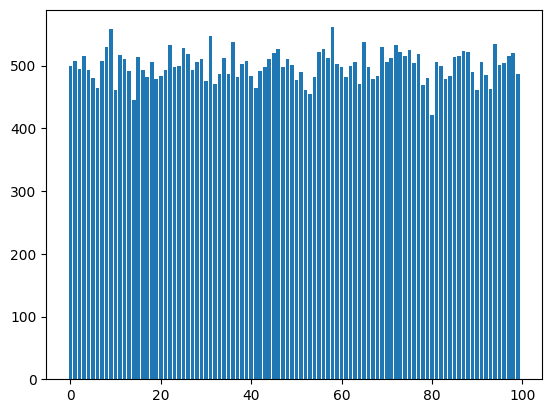

In [15]:
import uuid
import matplotlib.pyplot as plt

hash_map = HashMap(100)

for _ in range(50000):
    hash_map.put(uuid.uuid4(), 'some_value')

X = []
Y = []

for i, bucket in enumerate(hash_map.buckets):
    X.append(i)
    Y.append(len(bucket))
    
plt.bar(X, Y)
plt.show()
    
    
    
    